In [3]:
import face_recognition
import tensorflow as tf 
import cv2
from PIL import Image
import glob
import numpy as np
import seaborn as sns
import os
import matplotlib.pyplot as plt
from tensorflow.keras.applications import VGG19
from keras.applications.vgg16 import VGG16
from keras.applications.vgg16 import preprocess_input
from keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.models import Model
from keras.models import Sequential
from tensorflow.keras.utils import plot_model
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dense, Dropout, Flatten
from tensorflow.keras.optimizers import Adam
from keras.preprocessing import image
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten, Dropout, BatchNormalization, Activation

<frozen importlib._bootstrap>:219: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


# Videos to frames

In [10]:
import cv2
# Playing video from file:
cap = cv2.VideoCapture("E:\\Final_year Project\\Training Videos\\FEAR\\VID_20220928_140332.mp4")
#fourcc = cv2.VideoWriter_fourcc(*'XVID')

try:
    if not os.path.exists('data'):
        os.makedirs('data')
except OSError:
    print ('Error: Creating directory of data')

currentFrame = 0
while(True):
    # Capture frame-by-frame
    try:
        ret, frame = cap.read()

        # Saves image of the current frame in jpg file
        #name = './data/frame' + str(currentFrame) + '.jpg'
        print ('Creating...' , '.\\Training Dataset\\FEAR\\frame%d.jpg' % currentFrame)
        cv2.imwrite('E:\\Final_year Project\\Training Dataset\\FEAR\\FEAR3(%d).jpg' % currentFrame, frame)   

        # To stop duplicate images
        currentFrame += 1
    except:
        break
    
# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()

Creating... .\Training Dataset\FEAR\frame0.jpg
Creating... .\Training Dataset\FEAR\frame1.jpg
Creating... .\Training Dataset\FEAR\frame2.jpg
Creating... .\Training Dataset\FEAR\frame3.jpg
Creating... .\Training Dataset\FEAR\frame4.jpg
Creating... .\Training Dataset\FEAR\frame5.jpg
Creating... .\Training Dataset\FEAR\frame6.jpg
Creating... .\Training Dataset\FEAR\frame7.jpg
Creating... .\Training Dataset\FEAR\frame8.jpg
Creating... .\Training Dataset\FEAR\frame9.jpg
Creating... .\Training Dataset\FEAR\frame10.jpg
Creating... .\Training Dataset\FEAR\frame11.jpg
Creating... .\Training Dataset\FEAR\frame12.jpg
Creating... .\Training Dataset\FEAR\frame13.jpg
Creating... .\Training Dataset\FEAR\frame14.jpg
Creating... .\Training Dataset\FEAR\frame15.jpg
Creating... .\Training Dataset\FEAR\frame16.jpg
Creating... .\Training Dataset\FEAR\frame17.jpg
Creating... .\Training Dataset\FEAR\frame18.jpg
Creating... .\Training Dataset\FEAR\frame19.jpg
Creating... .\Training Dataset\FEAR\frame20.jpg
Cr

Creating... .\Training Dataset\FEAR\frame179.jpg
Creating... .\Training Dataset\FEAR\frame180.jpg
Creating... .\Training Dataset\FEAR\frame181.jpg
Creating... .\Training Dataset\FEAR\frame182.jpg
Creating... .\Training Dataset\FEAR\frame183.jpg
Creating... .\Training Dataset\FEAR\frame184.jpg
Creating... .\Training Dataset\FEAR\frame185.jpg
Creating... .\Training Dataset\FEAR\frame186.jpg
Creating... .\Training Dataset\FEAR\frame187.jpg
Creating... .\Training Dataset\FEAR\frame188.jpg
Creating... .\Training Dataset\FEAR\frame189.jpg
Creating... .\Training Dataset\FEAR\frame190.jpg
Creating... .\Training Dataset\FEAR\frame191.jpg
Creating... .\Training Dataset\FEAR\frame192.jpg
Creating... .\Training Dataset\FEAR\frame193.jpg
Creating... .\Training Dataset\FEAR\frame194.jpg
Creating... .\Training Dataset\FEAR\frame195.jpg
Creating... .\Training Dataset\FEAR\frame196.jpg
Creating... .\Training Dataset\FEAR\frame197.jpg
Creating... .\Training Dataset\FEAR\frame198.jpg
Creating... .\Traini

Creating... .\Training Dataset\FEAR\frame347.jpg
Creating... .\Training Dataset\FEAR\frame348.jpg
Creating... .\Training Dataset\FEAR\frame349.jpg
Creating... .\Training Dataset\FEAR\frame350.jpg
Creating... .\Training Dataset\FEAR\frame351.jpg
Creating... .\Training Dataset\FEAR\frame352.jpg
Creating... .\Training Dataset\FEAR\frame353.jpg
Creating... .\Training Dataset\FEAR\frame354.jpg
Creating... .\Training Dataset\FEAR\frame355.jpg
Creating... .\Training Dataset\FEAR\frame356.jpg
Creating... .\Training Dataset\FEAR\frame357.jpg
Creating... .\Training Dataset\FEAR\frame358.jpg
Creating... .\Training Dataset\FEAR\frame359.jpg
Creating... .\Training Dataset\FEAR\frame360.jpg
Creating... .\Training Dataset\FEAR\frame361.jpg
Creating... .\Training Dataset\FEAR\frame362.jpg
Creating... .\Training Dataset\FEAR\frame363.jpg
Creating... .\Training Dataset\FEAR\frame364.jpg
Creating... .\Training Dataset\FEAR\frame365.jpg
Creating... .\Training Dataset\FEAR\frame366.jpg
Creating... .\Traini

# Face Detection

In [20]:
cap = cv2.VideoCapture("E:\\Final_year Project\\Training Videos\\HAPPY\\VID_20220911_111728.mp4")

face_locations = []
while True:
    # Grab a single frame of video
    ret, frame = cap.read()
    
    frame = np.array(frame, dtype=np.uint8)

    # Convert the image from BGR color (which OpenCV uses) to RGB   
    # color (which face_recognition uses)
    rgb_frame = frame[:, :, ::-1]
    
    # Find all the faces in the current frame of video
    face_locations = face_recognition.face_locations(rgb_frame)
    for top, right, bottom, left in face_locations:
        # Draw a box around the face
        cv2.rectangle(frame, (left, top), (right, bottom), (0, 0,  
        255), 2)
    #Display the resulting image
    cv2.imshow('Video', frame)
    

    # Wait for Enter key to stop
    if cv2.waitKey(25) == 13:
        break

KeyboardInterrupt: 

# Pre-processing of data

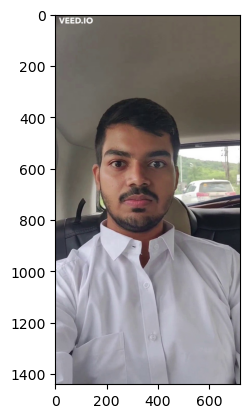

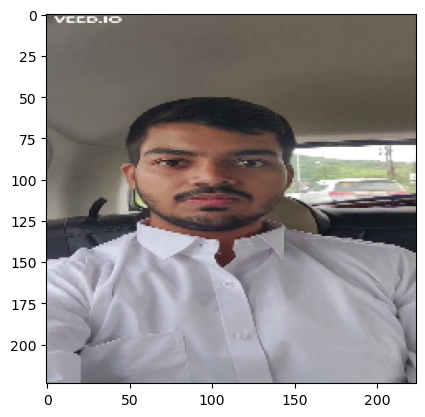

In [28]:
Datadir = "E:\\Final_year Project\\Training Dataset"  ##training dataset
Classes = ["ANGRY", "DISGUST", "FEAR", "HAPPY", "NEUTRAL", "SAD","SURPRISED"] #list of classes
for category in Classes:
    path = os.path.join(Datadir, category) ##//
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img))
        plt.imshow(cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB))
        plt.show()
        break
    break
img_size = 224 ##ImageNet => 224 x 224
new_array = cv2.resize(img_array, (img_size,img_size))
plt.imshow(cv2.cvtColor(new_array,cv2.COLOR_BGR2RGB))
plt.show()

In [29]:
training_data = [] ##data

def create_training_Data():
    for category in Classes:
        path = os.path.join(Datadir, category)
        class_num = Classes.index(category) ##0, 1 ##label
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img))
                new_array = cv2.resize(img_array, (img_size,img_size))
                training_data.append([new_array,class_num])
            except Exception as e:
                pass

In [5]:
create_training_Data()
print(len(training_data))

18670


In [6]:
import random

random.shuffle(training_data)
x = [] ##data/feature
y = [] ##label

for features,label in training_data:
    x.append(features)
    y.append(label)

x = np.array(x).reshape(-1, img_size, img_size, 3) ## converting it to 4 dimension

In [16]:
x.shape

(18670, 224, 224, 3)

In [9]:
#normalize the data
x = x/255.0 ; ##normalizing it ## sckit learn

MemoryError: Unable to allocate 20.9 GiB for an array with shape (18670, 224, 224, 3) and data type float64

# Deep learning model for training

In [12]:


#Initialize image data generator with rescaling
train_data_gen=ImageDataGenerator(rescale=1./255)
validation_data_gen=ImageDataGenerator(rescale=1./255)

train_generator=train_data_gen.flow_from_directory(
              'E:\\Final_year Project\\Training Dataset',
              target_size=(48, 48),
              batch_size=64,
              color_mode="grayscale",
              class_mode='categorical')

validation_generator=validation_data_gen.flow_from_directory(
            'E:\\Final_year Project\\Testing Dataset',
             target_size=(48, 48),
             batch_size=64,
             color_mode="grayscale",
             class_mode='categorical')

#create AlexNETmodel structure
emotion_model=Sequential()
emotion_model.add(Conv2D(32, kernel_size=(3, 3),activation='relu',padding = 'Same',input_shape=(48,48,1)))

emotion_model.add(Conv2D(64,kernel_size=(3, 3), activation='relu',padding = 'Same',))
emotion_model.add(MaxPooling2D(pool_size = (2, 2)))
emotion_model.add(Dropout(0.25))

emotion_model.add(Conv2D(128, (3, 3), activation='relu',padding = 'Same'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))

emotion_model.add(Conv2D(256, (3, 3), activation='relu',padding = 'Same'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))
emotion_model.add(Dropout(0.40))

emotion_model.add(Conv2D(512, (3, 3), activation='relu',padding = 'Same'))
emotion_model.add(MaxPooling2D(pool_size=(2, 2)))

emotion_model.add(Flatten())
emotion_model.add(Dense(1024, activation='relu'))
emotion_model.add(Dropout(0.5))
emotion_model.add(Dense(7, activation='softmax'))

emotion_model.compile(loss='categorical_crossentropy', optimizer=Adam(learning_rate=0.0001, decay=1e-6), metrics=['accuracy'], experimental_run_tf_function=False)

#Train the neural network/model
emotion_model_info=emotion_model.fit(
     train_generator,
     steps_per_epoch=18670 // 64,
     epochs = 15,
     validation_data=validation_generator,
     validation_steps=11200 // 64)

#save model structure in json file
model_json=emotion_model.to_json()
with open("C:\\Users\\Lenovobhavya\\Documents\\Project_PBL\\data\\emotion_model_new.json", "w") as json_file:
    json_file.write(model_json)
    
#save trained model weight in .h5 file
emotion_model.save_weights('C:\\Users\\Lenovobhavya\\Documents\\Project_PBL\\data\\emotion_model_new.h5')

Found 18670 images belonging to 7 classes.
Found 11200 images belonging to 7 classes.
Epoch 1/15
291/291 [==============================] - 1970s 7s/step - loss: 1.4878 - accuracy: 0.3898 - val_loss: 0.9194 - val_accuracy: 0.6682
Epoch 2/15
291/291 [==============================] - 1756s 6s/step - loss: 0.5297 - accuracy: 0.7965 - val_loss: 0.4200 - val_accuracy: 0.8539
Epoch 3/15
291/291 [==============================] - 3612s 12s/step - loss: 0.2469 - accuracy: 0.9051 - val_loss: 0.2435 - val_accuracy: 0.9156
Epoch 4/15
291/291 [==============================] - 1718s 6s/step - loss: 0.1591 - accuracy: 0.9386 - val_loss: 0.1262 - val_accuracy: 0.9454
Epoch 5/15
291/291 [==============================] - 1630s 6s/step - loss: 0.1167 - accuracy: 0.9530 - val_loss: 0.1045 - val_accuracy: 0.9458
Epoch 6/15
291/291 [==============================] - 1757s 6s/step - loss: 0.0890 - accuracy: 0.9628 - val_loss: 0.0947 - val_accuracy: 0.9542
Epoch 7/15
291/291 [=============================

In [15]:
emotion_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_5 (Conv2D)           (None, 48, 48, 32)        320       
                                                                 
 conv2d_6 (Conv2D)           (None, 48, 48, 64)        18496     
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 24, 24, 64)       0         
 2D)                                                             
                                                                 
 dropout_3 (Dropout)         (None, 24, 24, 64)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 128)       73856     
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 12, 12, 128)      0         
 2D)                                                  

In [18]:
checkpoint=ModelCheckpoint("C:\\Users\\Lenovobhavya\\Documents\\Project_PBL\\data\\emotion_model_new.h5", monitor='val_accuracy', verbose=1, save_best_only=True, mode= 'max')
early_stopping=EarlyStopping(monitor='val_loss',
                            min_delta=0,
                            patience=3,
                            verbose=1,
                            restore_best_weights=True)
reduce_learningrate = ReduceLROnPlateau(monitor= 'val_loss',
                                factor = 0.2,
                                patience=3,
                                 verbose = 1,
                                min_delta=0.0001)
callbacks_list = [early_stopping, checkpoint, reduce_learningrate]

history = emotion_model.fit(
     train_generator,
     steps_per_epoch=7779 // 64,
     epochs = 15,
     validation_data=validation_generator,
     validation_steps=7519 // 64,
     callbacks = [early_stopping, checkpoint, reduce_learningrate])
print("Done!")

plt.figure (figsize=(20,10))
plt.subplot(1, 2, 1)
plt.suptitle( 'Optimizer:Adam', fontsize=10)
plt.ylabel('Loss', fontsize=16)
plt.plot(history.history['loss'], label= 'Training Loss')
plt.plot(history.history['val_loss'], label= 'Validation Loss')
plt.legend (loc='upper right')
plt.subplot (1, 2, 2)
plt.ylabel('Accuracy')
plt.plot(history.history['accuracy'], label= 'Training Accuracy')
plt.plot(history.history['val_accuracy'], label= 'Validation Accuracy')
plt.legend (loc= 'lower right')
plt.show()

Found 18670 images belonging to 7 classes.
Found 11200 images belonging to 7 classes.


NameError: name 'emotion_model' is not defined

# AlexNet Model

In [1]:
image_shape = (224,224,3)

In [4]:
np.random.seed(1000)

In [5]:
Alex_model = Sequential()
#1st Layer
Alex_model.add(Conv2D(filters=96, input_shape=image_shape, kernel_size=(11,11),strides=(4,4), padding='valid'))
Alex_model.add(Activation('relu'))

Alex_model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2),padding='valid'))
#2nd Layer
Alex_model.add(Conv2D(filters=256, kernel_size=(5,5),strides=(1,1), padding='valid'))
Alex_model.add(Activation('relu'))

Alex_model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2),padding='valid'))
#3rd Layer
Alex_model.add(Conv2D(filters=384, kernel_size=(3,3),strides=(1,1), padding='valid'))
Alex_model.add(Activation('relu'))
#4th Layer
Alex_model.add(Conv2D(filters=384, kernel_size=(3,3),strides=(1,1), padding='valid'))
Alex_model.add(Activation('relu'))
#5th Layer
Alex_model.add(Conv2D(filters=256, kernel_size=(3,3),strides=(1,1), padding='valid'))
Alex_model.add(Activation('relu'))

Alex_model.add(MaxPooling2D(pool_size=(3,3), strides=(2,2),padding='valid'))

Alex_model.add(Flatten())

Alex_model.add(Dense(4096, input_shape=(227*227*3,)))
Alex_model.add(Activation('relu'))
Alex_model.add(Dropout(0.4))

Alex_model.add(Dense(4096))
Alex_model.add(Activation('relu'))
Alex_model.add(Dropout(0.4))

Alex_model.add(Dense(7))
Alex_model.add(Activation('softmax'))
Alex_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 54, 54, 96)        34944     
                                                                 
 activation (Activation)     (None, 54, 54, 96)        0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 26, 26, 96)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 256)       614656    
                                                                 
 activation_1 (Activation)   (None, 22, 22, 256)       0         
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 10, 10, 256)      0         
 2D)                                                    

In [6]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.losses import categorical_crossentropy
Alex_model.compile(loss=categorical_crossentropy, optimizer='adam', metrics=["accuracy"])

In [9]:
AlexNet=Alex_model.fit(training_set, 
                      epochs = 2, 
                      batch_size = 25,
                      steps_per_epoch = len(training_set) , 
                      validation_data = test_set,
                      validation_steps = len(test_set))

Epoch 1/2
584/584 [==============================] - 5661s 10s/step - loss: 1.9427 - accuracy: 0.1638 - val_loss: 1.9485 - val_accuracy: 0.1429
Epoch 2/2
584/584 [==============================] - 5666s 10s/step - loss: 1.9416 - accuracy: 0.1650 - val_loss: 1.9503 - val_accuracy: 0.1429


In [25]:
Alex_model_json=Alex_model.to_json()
with open("C:\\Users\\Lenovobhavya\\Documents\\Project_PBL\\data\\AlexNet_model.json", "w") as json_file:
    json_file.write(Alex_model_json)
    
#save trained model weight in .h5 file
Alex_model.save_weights('C:\\Users\\Lenovobhavya\\Documents\\Project_PBL\\data\\AlexNet_model.h5')

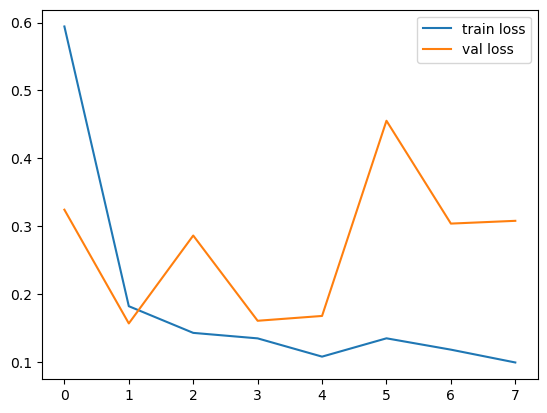

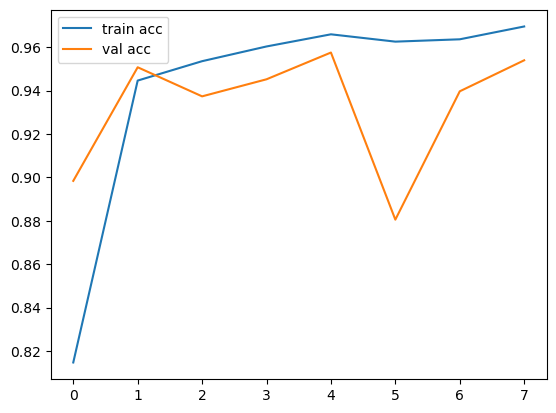

<Figure size 640x480 with 0 Axes>

In [32]:
import matplotlib.pyplot as plt
plt.plot(Alex_model.history['loss'], label='train loss')
plt.plot(Alex_model.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('E:\\Final_year Project\\Alex_LossVal_loss.png')

#accuracy
plt.plot(Alex_model.history['accuracy'], label='train acc')
plt.plot(Alex_model.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()
plt.savefig('E:\\Final_year Project\\Alex_AccVal_acc.png')

# VGG16 Model

In [2]:
IMAGE_SIZE = [224,224]
train_path = 'E:\\Final_year Project\\Training Dataset'
valid_path = 'E:\\Final_year Project\\Testing Dataset'

In [3]:
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights = 'imagenet', include_top = False)

for layer in vgg.layers:
    layer.trainable = False

In [4]:
from glob import glob
folders = glob('E:\\Final_year Project\\Training Dataset//*')
print(len(folders))

7


In [5]:
x = Flatten()(vgg.output)
prediction = Dense(7, activation='softmax')(x)

In [6]:
vggmodel = Model(inputs=vgg.input, outputs = prediction)
vggmodel.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [7]:
vggmodel.compile(loss = 'categorical_crossentropy', optimizer= 'adam', metrics = ['accuracy'])

In [8]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                                shear_range = 0.2,
                                                zoom_range = 0.2,
                                                horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale=1./255)
training_set = train_datagen.flow_from_directory('E:\\Final_year Project\\Training Dataset',
                                                              target_size = (224,224),
                                                              batch_size = 32,
                                                             class_mode = 'categorical')
test_set = train_datagen.flow_from_directory('E:\\Final_year Project\\Testing Dataset',
                                                              target_size = (224,224),
                                                              batch_size = 32,
                                                             class_mode = 'categorical')

Found 18670 images belonging to 7 classes.
Found 11200 images belonging to 7 classes.


In [36]:
print(len(training_set))
print(len(test_set))

584
350


In [10]:
r = vggmodel.fit(training_set,
                 validation_data = test_set,
                 epochs = 2,
                 steps_per_epoch = len(training_set),
                 validation_steps = len(test_set))


Epoch 1/2
584/584 [==============================] - 7104s 12s/step - loss: 0.3927 - accuracy: 0.8747 - val_loss: 0.1895 - val_accuracy: 0.9323
Epoch 2/2
584/584 [==============================] - 7127s 12s/step - loss: 0.1381 - accuracy: 0.9578 - val_loss: 0.1434 - val_accuracy: 0.9556


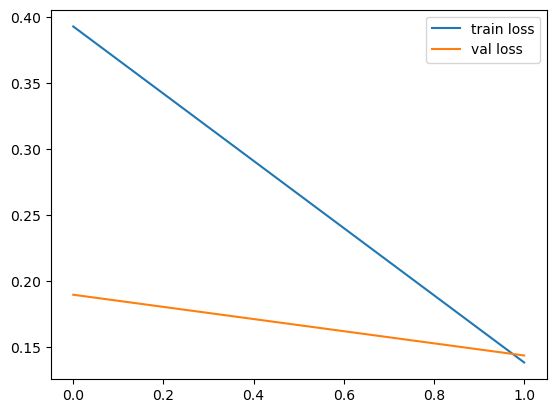

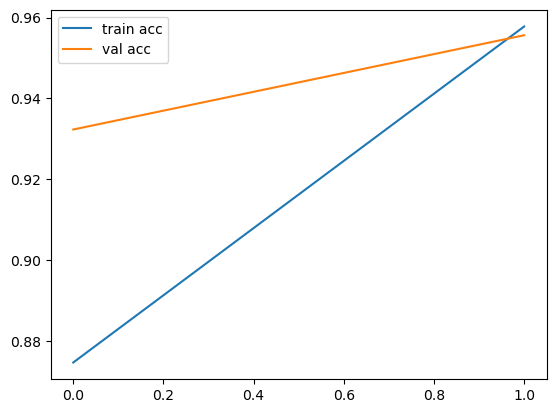

<Figure size 640x480 with 0 Axes>

In [11]:
#loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('E:\\Final_year Project\\VGG16_LossVal_loss')

#accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'],label='val acc')
plt.legend()
plt.show()
plt.savefig('E:\\Final_year Project\\VGG16_AccVal_acc')
r_json=vggmodel.to_json()
with open("C:\\Users\\Lenovobhavya\\Documents\\Project_PBL\\data\\VGG16_model.json", "w") as json_file:
    json_file.write(r_json)
    
#save trained model weight in .h5 file
vggmodel.save_weights('C:\\Users\\Lenovobhavya\\Documents\\Project_PBL\\data\\VGG16_model.h5')

# VGG19 Model

In [60]:
from keras.preprocessing.image import ImageDataGenerator
from keras.applications.vgg19 import VGG19
from keras.layers import Flatten, Dense, Dropout, Conv2D, MaxPool2D,BatchNormalization, LSTM, CuDNNLSTM, MaxPooling2D
from keras.models import Sequential
from keras import regularizers
import keras

from keras.layers import TimeDistributed
from keras.layers import GlobalAveragePooling2D
from tensorflow.keras.applications import MobileNetV2

from tensorflow.keras.optimizers import Adam
import tensorflow as tf

import matplotlib.pyplot as plt
import cv2

In [61]:
image_generator = ImageDataGenerator(
    rescale=1./255, 
    horizontal_flip=2, 
    vertical_flip=2
)    

training_set = image_generator.flow_from_directory(batch_size=256,
                                                 directory="E:\\Final_year Project\\Training Dataset",
                                                 shuffle=True,
                                                 target_size=(48, 48), 
                                                 class_mode='categorical',
#                                                  color_mode = "grayscale"
                                                )

testing_set = image_generator.flow_from_directory(batch_size=128,
                                                 directory="E:\\Final_year Project\\Testing Dataset",
                                                 shuffle=True,
                                                 target_size=(48, 48), 
                                                 class_mode='categorical',
#                                                  color_mode = "grayscale"
                                                 )

Found 18670 images belonging to 7 classes.
Found 11200 images belonging to 7 classes.


In [62]:
training_set.class_indices

{'ANGRY': 0,
 'DISGUST': 1,
 'FEAR': 2,
 'HAPPY': 3,
 'NEUTRAL': 4,
 'SAD': 5,
 'SURPRISED': 6}

In [72]:
VGG_model = VGG19(
      input_shape = (48, 48, 3),
      include_top = False,
      weights = 'imagenet'
    )

In [73]:
for layers in model.layers:
    layers.trainable = False

In [74]:
x = Flatten()(VGG_model.output)
x = Dense(512, activation = "relu")(x)
x = Dropout(0.5)(x)
x = Dense(14, activation = "relu")(x)
x = Dense(7, activation = "softmax")(x)

VGG_model = keras.Model(VGG_model.input, x)
VGG_model.compile(loss = "categorical_crossentropy", optimizer = "adam", metrics = "accuracy")
VGG_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 48, 48, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 48, 48, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 48, 48, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 24, 24, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 24, 24, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 24, 24, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 12, 12, 128)       0   

In [83]:
hist = VGG_model.fit(training_set, validation_data = testing_set , epochs = 4)

Epoch 1/4
73/73 [==============================] - 3664s 51s/step - loss: 1.9434 - accuracy: 0.1665 - val_loss: 1.9468 - val_accuracy: 0.1429
Epoch 2/4
73/73 [==============================] - 3969s 54s/step - loss: 1.9424 - accuracy: 0.1664 - val_loss: 1.9477 - val_accuracy: 0.1429
Epoch 3/4
73/73 [==============================] - 4108s 56s/step - loss: 1.9417 - accuracy: 0.1665 - val_loss: 1.9485 - val_accuracy: 0.1429
Epoch 4/4
73/73 [==============================] - 4622s 63s/step - loss: 1.9414 - accuracy: 0.1664 - val_loss: 1.9493 - val_accuracy: 0.1429


In [84]:
hist = hist.history

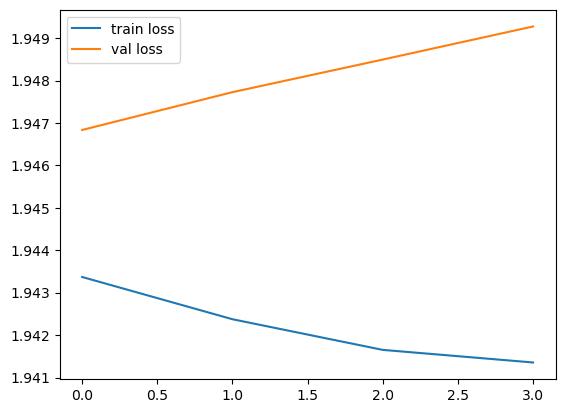

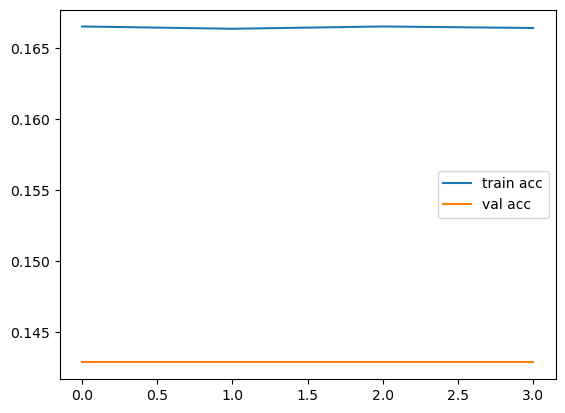

<Figure size 640x480 with 0 Axes>

In [85]:
#loss
plt.plot(hist['loss'], label='train loss')
plt.plot(hist['val_loss'],label='val loss')
plt.legend()
plt.show()
plt.savefig('E:\\Final_year Project\\VGG19_LossVal_loss')

#accuracy
plt.plot(hist['accuracy'], label='train acc')
plt.plot(hist['val_accuracy'],label='val acc')
plt.legend()
plt.show()
plt.savefig('E:\\Final_year Project\\VGG19_AccVal_acc')

In [86]:
VGG_model.save("C:\\Users\\Lenovobhavya\\Documents\\Project_PBL\\data\\VGG19v1.h5")
model_json=VGG_model.to_json()
with open("C:\\Users\\Lenovobhavya\\Documents\\Project_PBL\\data\\VGG19.json", "w") as json_file:
    json_file.write(model_json)

# Real-time Sentiment detection

In [13]:
import cv2 
import numpy as np

from keras.models import model_from_json

emotion_dict={0: "Angry", 1: "Disgust", 2: "Fear", 3: "Happy", 
                    4: "Neutral", 5: "Sad", 6: "Surprise"}

#Load json and create model
json_file=open("C:\\Users\\Lenovobhavya\\Documents\\Project_PBL\\data\\emotion_model_new.json", 'r')
loaded_model_json=json_file.read()
json_file.close ()
VGG16_emotion=model_from_json(loaded_model_json)
#Load weights into new model
VGG16_emotion.load_weights("C:\\Users\\Lenovobhavya\\Documents\\Project_PBL\\data\\emotion_model_new.h5")
print("loaded model from disk")
#start the webcam feed
cap=cv2.VideoCapture ("E:\\Final_year Project\\Training Videos\\SURPRISED\\surprised 7.mp4")
while True:
    #Find haar cascade to draw bounding box around face
    ret, frame=cap.read ()
    frame=cv2.resize(frame, (400,400))
    if not ret:
        break
    face_detector=cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")
    gray_frame=cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    
    
    #detect faces available in video
    num_faces=face_detector.detectMultiScale(gray_frame, scaleFactor=1.32, minNeighbors=5)
    #take each face available in the video and Preprocess it
    for (x, y, w, h) in num_faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0),2)
        roi_gray_frame=gray_frame [y:y+w, x:x+h]
        img_pix= np.expand_dims (np.expand_dims(cv2.resize(roi_gray_frame, (48, 48)), -1), 0)        

        
        #predict the emotions
        prediction=VGG16_emotion.predict(img_pix)
        maxindex = int(np.argmax (prediction))
        cv2. putText(frame, emotion_dict[maxindex], (x+5, y-20), cv2. FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2, cv2.LINE_AA)            
    #resized_img = cv2.resize(frame,(1000,700))
    #cv2.imshow('Face Sentiment Recognition', resized_img)
    cv2.imshow('Emotion Detection', frame)
    
    if cv2.waitKey(10) == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

loaded model from disk


error: OpenCV(4.5.5) D:\a\opencv-python\opencv-python\opencv\modules\imgproc\src\resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'cv::resize'
